In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [2]:
conn=sqlite3.connect('database.sqlite')
filtered_data=pd.read_sql_query('''SELECT * FROM REVIEWS WHERE SCORE!=3''',conn)

In [3]:
filtered_data.Score=filtered_data.Score.apply(lambda x:'positive' if x>3 else 'negative')

In [4]:
sorted_values=filtered_data.sort_values('ProductId',axis=0,ascending=True)
final=sorted_values.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [5]:
final['Time']=pd.to_datetime(final['Time'])
final=final.sort_values(by='Time',ascending=True)
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,1970-01-01 00:00:00.939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,1970-01-01 00:00:00.940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,1970-01-01 00:00:00.944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,1970-01-01 00:00:00.944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,1970-01-01 00:00:00.946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...


In [6]:
final=final.iloc[:100000,:]

In [7]:
final.Score=final.Score.apply(lambda x:1 if x=='positive' else 0)

In [8]:
final['Length_Review']=final.Text.apply(len)

In [9]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Length_Review
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,1970-01-01 00:00:00.939340800,EVERY book is educational,this witty little book makes my son laugh at l...,375
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,1970-01-01 00:00:00.940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,407
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,1970-01-01 00:00:00.944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,166
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,1970-01-01 00:00:00.944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222
417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,1970-01-01 00:00:00.946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,244


In [10]:
final.shape

(100000, 11)

# Text Preprocessing


In [11]:
import nltk
import re
def clean_html(sent):
    clean_text=re.sub(r"[<*.?>]",' ',sent)
    return clean_text

def clean_punc(sent):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

In [12]:
from tqdm import tqdm
import os

final_string=[]
for i,sent in enumerate(tqdm(final.Text.values)):
    filtered_sentence=[]
    sent=clean_html(sent)
    for w in sent.split():
        for word in clean_punc(w).split():
            if ((word.isalpha())&(len(word)>2)):
                if word.lower() not in stop:
                    s=(sno.stem(word.lower())).encode('utf-8')
                    filtered_sentence.append(s)
    string=b' '.join(filtered_sentence)
    final_string.append(string)

final['Cleaned_Text']=final_string
final['Cleaned_Text']=final['Cleaned_Text'].str.decode('utf-8')

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:27<00:00, 1138.17it/s]


In [13]:
from tqdm import tqdm
import os

final_string=[]
for i,sent in enumerate(tqdm(final.Summary.values)):
    filtered_sentence=[]
    sent=clean_html(sent)
    for w in sent.split():
        for word in clean_punc(w).split():
            if ((word.isalpha())&(len(word)>2)):
                if word.lower() not in stop:
                    s=(sno.stem(word.lower())).encode('utf-8')
                    filtered_sentence.append(s)
    string=b' '.join(filtered_sentence)
    final_string.append(string)

final['Cleaned_Summary']=final_string
final['Cleaned_Summary']=final['Cleaned_Summary'].str.decode('utf-8')

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 16498.23it/s]


In [14]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Length_Review,Cleaned_Text,Cleaned_Summary
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,1970-01-01 00:00:00.939340800,EVERY book is educational,this witty little book makes my son laugh at l...,375,witti littl book make son laugh loud recit car...,everi book educ
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,1970-01-01 00:00:00.940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,407,rememb see show air televis year ago child sis...,whole seri great way spend time child
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,1970-01-01 00:00:00.944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,166,beetlejuic well written movi everyth excel act...,entertainingl funni
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,1970-01-01 00:00:00.944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222,twist rumplestiskin captur film star michael k...,modern day fairi tale
417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,1970-01-01 00:00:00.946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,244,beetlejuic excel funni movi keaton hilari wack...,fantast


# Time Based Splitting

In [15]:
from sklearn.model_selection import train_test_split
X_train_text,X_test_text,y_train,y_test=train_test_split(final.Cleaned_Text,final.Score,test_size=0.30,shuffle=False)
X_train_summary,X_test_summary,y_train,y_test=train_test_split(final.Cleaned_Summary,final.Score,test_size=0.30,shuffle=False)
X_train_length,X_test_length,y_train,y_text=train_test_split(final.Length_Review,final.Score,test_size=0.30,shuffle=False)

final.Score.value_counts(),

(1    87729
 0    12271
 Name: Score, dtype: int64,)

#### As we can see Our Data is Highly Imbalanced Positive class is far more than Negative Class

# Bag of Words Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# Creating BOW for Text Column
cv_bow_text=CountVectorizer()
bow_X_train_text=cv_bow_text.fit_transform(X_train_text.values)
bow_X_test_text=cv_bow_text.transform(X_test_text.values)

In [17]:
# Creating BOW for Summary Column
cv_bow_summary=CountVectorizer(max_features=100,min_df=50)
bow_X_train_summary=cv_bow_summary.fit_transform(X_train_summary.values)
bow_X_test_summary=cv_bow_summary.transform(X_test_summary.values)


In [18]:
X_train_length=X_train_length.values.reshape(-1,1)
X_test_length=X_test_length.values.reshape(-1,1)

In [19]:
X_train_length.shape

(70000, 1)

In [20]:
from scipy.sparse import hstack

bow_X_train=hstack([bow_X_train_text,bow_X_train_summary,X_train_length])
bow_X_test=hstack([bow_X_test_text,bow_X_test_summary,X_test_length])

In [21]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler(with_mean=False)
bow_X_train=sc1.fit_transform(bow_X_train)
bow_X_test=sc1.transform(bow_X_test)

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### I am Using MultinomialNB beacause it is given in sklearn that it works very well with discrete features and when working with word counts as we are not using binary features in BOW  it is best

### Finding Optimal Value for Alpha

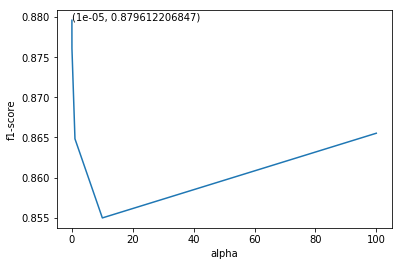

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
a=[0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
cv_score=[]
for i in a:
    classifier=MultinomialNB(alpha=i)
    scores = cross_val_score(classifier, bow_X_train, y_train, cv=10, scoring='f1')
    cv_score.append(scores.mean())

optimal_alpha=a[cv_score.index(max(cv_score))]
plt.plot(a,cv_score)
xy = (optimal_alpha, max(cv_score))
plt.annotate('(%s, %s)' % xy,xy=xy,textcoords='data')
plt.xlabel("alpha")
plt.ylabel("f1-score")
plt.show()  


In [24]:
optimal_alpha

1e-05

#### Optimal Value for alpha by 10-Fold Validation is 0.00001

### Accuracy Metrics 

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
classifier=MultinomialNB(alpha=optimal_alpha)
classifier.fit(bow_X_train,y_train)
pred_train=classifier.predict(bow_X_train)
pred_test=classifier.predict(bow_X_test)
accuracy_bow_train=accuracy_score(y_train,pred_train)*100
accuracy_bow_test=accuracy_score(y_test,pred_test)*100
print("Training Accuracy- {}%".format(accuracy_bow_train))
print("Testing Accuracy- {}%".format(accuracy_bow_test))
print("Training Error- {}%".format(100-accuracy_bow_train))
print("Testing Error- {}%".format(100-accuracy_bow_test))

Training Accuracy- 90.73428571428572%
Testing Accuracy- 83.58%
Training Error- 9.265714285714282%
Testing Error- 16.42%


#### As both Training and Testing Error are low We can say that Our Model is doing Fine 

#### But we can't rely on simple Accuracy as our data is highly Imabalaced

#### Accuracy for Test data is 83.58%

### Classification Report 

In [27]:
print(classification_report(y_test,pred_test))

             precision    recall  f1-score   support

          0       0.43      0.59      0.49      4103
          1       0.93      0.88      0.90     25897

avg / total       0.86      0.84      0.85     30000



#### For Negative Reviews Recall is 0.59 or 59% which means out of all Actual Negative Points we are just predicting 59% of negative correctly which is bad while in Positive Reviews we are predicting 88% of Reviews as Positive out of all Actual Positive Reviews

#### F1 Score for Negative Review(0) is also very low

### Confusion Matrix

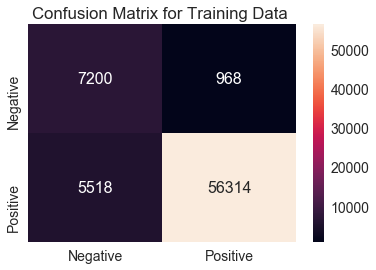

In [33]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Training Data ')
plt.show()

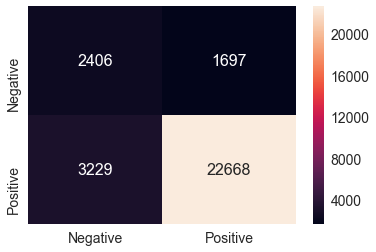

In [34]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### From Confusion Matrix We can see that we are prediciting alot of negative reviews as positive as 1697 negative reveiws are preidcted as positive

In [35]:
TN,FN,FP,TP = confusion_matrix(y_test, pred_test).ravel()

TPR = TP/(FN + TP)

FPR = FP/(TN + FP)

TNR = TN/(TN + FP)

FNR = FN/(FN + TP)

print("TPR- {}".format(TPR))
print("FPR- {}".format(FPR))
print("TNR- {}".format(TNR))
print("FNR- {}".format(FNR))

TPR- 0.930350913195157
FPR- 0.5730257320319432
TNR- 0.42697426796805676
FNR- 0.06964908680484301


#### TPR is High which is good 
#### TNR is Low which is not good
#### FPR is Higher than TNR which is not good
#### FNR is low which is good

### Important Features

In [36]:
bow_features_text =cv_bow_text.get_feature_names()
bow_features_summary =cv_bow_summary.get_feature_names()
bow_features=bow_features_text+bow_features_summary+['Lenght of Review']
log_prob= classifier.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns = bow_features)
feature_prob=feature_prob.T
feature_prob.head()

,0,1
aaa,-26.658542,-11.459752
aaaaaaaaagghh,-26.658542,-11.459752
aaaaah,-26.658542,-11.113171
aaaaahhhhhhhhhhhhhhhh,-26.658542,-11.459752
aaaah,-26.658542,-11.459752


#### Important Features for Negative Review

In [37]:
feature_prob[0].sort_values(ascending = False)[0:10]

Lenght of Review   -6.107965
tast               -6.446552
product            -6.555517
like               -6.574484
disappoint         -6.584159
would              -6.644072
one                -6.766381
bad                -6.813411
disappoint         -6.822687
tri                -6.824184
Name: 0, dtype: float64

#### Important Features for Positive Review

In [38]:
feature_prob[1].sort_values(ascending = False)[0:10]

Lenght of Review   -6.065358
great              -6.563717
love               -6.626023
good               -6.628695
tast               -6.670320
like               -6.675301
tri                -6.814300
flavor             -6.820576
one                -6.824214
make               -6.848042
Name: 1, dtype: float64

# TF-IDF Model

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
tfidf_vect_text=TfidfVectorizer(ngram_range=(1,2))
tfidf_X_train_text=tfidf_vect_text.fit_transform(X_train_text.values)
tfidf_X_test_text=tfidf_vect_text.transform(X_test_text.values)

tfidf_vect_summary=TfidfVectorizer(ngram_range=(1,2),max_features=100,min_df=50)
tfidf_X_train_summary=tfidf_vect_summary.fit_transform(X_train_summary.values)
tfidf_X_test_summary=tfidf_vect_summary.transform(X_test_summary.values)

from scipy.sparse import hstack

tfidf_X_train=hstack([tfidf_X_train_text,tfidf_X_train_summary,X_train_length])
tfidf_X_test=hstack([tfidf_X_test_text,tfidf_X_test_summary,X_test_length])

from sklearn.preprocessing import StandardScaler
sc1=StandardScaler(with_mean=False)
tfidf_X_train=sc1.fit_transform(tfidf_X_train)
tfidf_X_test=sc1.transform(tfidf_X_test)

### Finding Optimal Value for Alpha

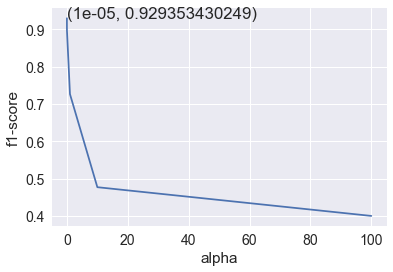

In [49]:
a=[0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
cv_score=[]
for i in a:
    classifier=MultinomialNB(alpha=i)
    scores = cross_val_score(classifier, tfidf_X_train, y_train, cv=10, scoring='f1')
    cv_score.append(scores.mean())

optimal_alpha=a[cv_score.index(max(cv_score))]
plt.plot(a,cv_score)
xy = (optimal_alpha, max(cv_score))
plt.annotate('(%s, %s)' % xy,xy=xy,textcoords='data')
plt.xlabel("alpha")
plt.ylabel("f1-score")
plt.show()  
  

#### Optimal Value for alpha by 10-Fold Validation is 0.00001

### Accuracy Metrics 

In [50]:
classifier=MultinomialNB(alpha=optimal_alpha)
classifier.fit(tfidf_X_train,y_train)
pred_train=classifier.predict(tfidf_X_train)
pred_test=classifier.predict(tfidf_X_test)
accuracy_tfidf_train=accuracy_score(y_train,pred_train)*100
accuracy_tfidf_test=accuracy_score(y_test,pred_test)*100
print("Training Accuracy- {}%".format(accuracy_tfidf_train))
print("Testing Accuracy- {}%".format(accuracy_tfidf_test))
print("Training Error- {}%".format(100-accuracy_tfidf_train))
print("Testing Error- {}%".format(100-accuracy_tfidf_test))


Training Accuracy- 99.93285714285715%
Testing Accuracy- 85.41%
Training Error- 0.06714285714285495%
Testing Error- 14.590000000000003%


#### Testing error is little High with respect to training error might be Overfitting here

#### But we can't rely on simple Accuracy as our data is highly Imabalaced

#### Accuracy for Test data is 85.41%

### Classification Report

In [51]:
print(classification_report(y_test,pred_test))

             precision    recall  f1-score   support

          0       0.40      0.13      0.20      4103
          1       0.88      0.97      0.92     25897

avg / total       0.81      0.85      0.82     30000



#### For Negative Reviews Recall is 0.13 or 13% which means out of all Actual Negative Points we are just predicting 13% of negative correctly which is bad while in Positive Reviews we are predicting 97% of Reviews as Positive out of all Actual Positive Reviews

#### F1 Score for Negative Review(0) is also very low

#### Model through TFIDF is predicting most of the Points as Positive reveiws as recall for negative review is very low

### Confusion Matrix

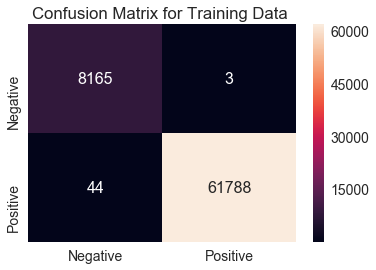

In [52]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion Matrix for Training Data ')
plt.show()

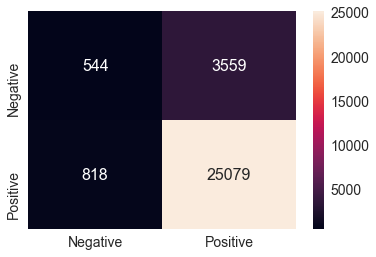

In [53]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### From Confusion Matrix We can see that we are predicted more Negetive Reviews as Postive Reviews than Negative Reviews as Negative Reviews i.e. Out of 4098 Negative reviews we are predicting 3553 reviews as Positive 

In [54]:
TN,FN,FP,TP = confusion_matrix(y_test, pred_test).ravel()

TPR = TP/(FN + TP)

FPR = FP/(TN + FP)

TNR = TN/(TN + FP)

FNR = FN/(FN + TP)

print("TPR-{}".format(TPR))
print("FPR-{}".format(FPR))
print("TNR-{}".format(TNR))
print("FNR-{}".format(FNR))

TPR-0.8757245617710734
FPR-0.6005873715124816
TNR-0.39941262848751835
FNR-0.1242754382289266


### Important Features

In [55]:
tfidf_features_text =tfidf_vect_text.get_feature_names()
tfidf_features_summary =tfidf_vect_summary.get_feature_names()
tfidf_features=tfidf_features_text+tfidf_features_summary+["Length of Review"]
log_prob = classifier.feature_log_prob_
feature_prob = pd.DataFrame(log_prob, columns = tfidf_features)
feature_prob=feature_prob.T
feature_prob.head()

,0,1
aaa,-29.136063,-13.913703
aaa perfect,-29.136063,-13.913703
aaaaaaaaagghh,-29.136063,-13.913703
aaaaah,-29.136063,-13.573255
aaaaah awak,-29.136063,-13.913703


#### Important Features for Negative Review

In [56]:
feature_prob[0].sort_values(ascending = False)[0:10]

Length of Review   -8.585486
tast               -8.907593
like               -9.016520
product            -9.085389
disappoint         -9.088748
would              -9.132766
one                -9.268544
bad                -9.330429
money              -9.369090
tri                -9.380889
Name: 0, dtype: float64

#### Important Features for Positive Review

In [58]:
feature_prob[1].sort_values(ascending = False)[0:10]

Length of Review   -8.519309
tast               -9.071639
great              -9.072093
like               -9.097226
love               -9.106406
good               -9.109795
flavor             -9.202779
one                -9.254110
use                -9.254616
product            -9.266829
Name: 1, dtype: float64

# Conclusion
* Accuracy for TF-IDF model is more but we can't rely on Accuracy as our data is imbalance
* F1-Score for BOW model is more which shows that our bag of words model is doing better than TFIDF
* Recall for Both Labels in BOW is better than TFIDF as in TFIDF most of the points are predicted as positive 
* There is very small change in F1 Score with both models
